# Supernova Signal
Demonstrating the `Supernova_Models` and `SN_plotter` modules.

```
Created : June 2021
Last Update : 09-11-2021 
Melih Kara kara@kit.edu 
Ricardo Peres
```

## Table of Contents
- [1D Rates](#rates)
- [Plotting](#plot-data)<br>
    - [Luminosity vs time/energy](#lum-plots)<br>
    - [Flux vs time/energy](#num-plots)<br>
    - [Integrated flux over time](#nu-flux)
    
**For 2D interaction rates and plots see [this notebook](Supernova_Signal-2.ipynb)**

# Read model compute 1D recoil rates<a class="anchor" id="rates"></a>

In [2]:
# allows to import from the parent directory
import sys; sys.path.append('../')

from snx import *
from snx.SN_plotter import Plotter
from snx.Supernova_Models import SN_lightcurve

2022-03-08 16:01:31,437 - utilix - WARNING - Could not load a configuration file. You can create one at /home/frazer/.xenon_config, or set a custom path using

export XENON_CONFIG=path/to/your/config

*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [3]:
for k, v in paths.items():
    print(f'{k:6s} -> {v}')

img    -> /home/frazer/Documents/LArnT/data
data   -> /home/frazer/Documents/LArnT/img


In [4]:
M30sn_model  = SN_lightcurve(progenitor_mass = 30,
                             metallicity= 0.02,
                             time_of_revival = 100, 
                             distance = 10)

Retrieving object /home/frazer/Documents/LArnT/imgObject_M30-Z0.02_dist10.p
Object was found! 
To save manually: save_object(filename, update=True)



In [5]:
M30sn_model.get_recoil_spectra1D()
print("\n","; ".join([attr for attr in dir(M30sn_model) if not attr.startswith('_')]))
print('\n>> Notice rate1D and total_rate1D are included !')

Retrieving object /home/frazer/Documents/LArnT/imgObject_M30-Z0.02_dist10_Er0.0-20.0_t0-0-tf-10_1D.p

 ArNuc; E_bins_left; E_bins_right; L_ave; L_list; L_ve; L_vx; M; N_ave; N_ve; N_vx; Z; dist; fluxes_at_tpc; get_flux_at_; get_integ_fluxes; get_recoil_spectra1D; get_recoil_spectra2D; get_total_rate; mean_E; name; nu_list; rate1D; recoil_en; retrieve_object; sample_from_recoil_spectrum; save_object; t; t0; t_revival; tf; total_rate1D

>> Notice rate1D and total_rate1D are included !


### Plot the data<a class="anchor" id="plot-data"></a>

In [6]:
plotter = Plotter(M30sn_model)

#### Luminosity plots<a class="anchor" id="lum-plots"></a>

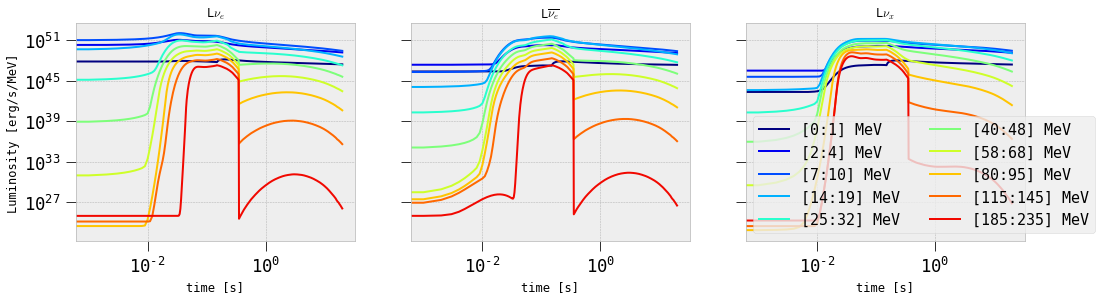

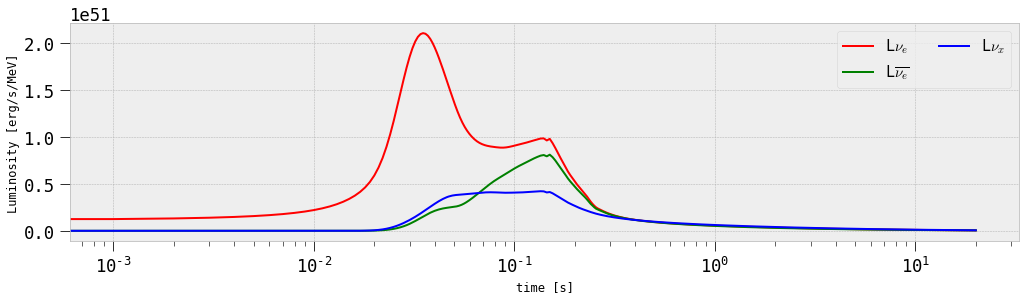

In [7]:
plotter.plot_data();
plotter.plot_data(ftype='single', yscale='linear');

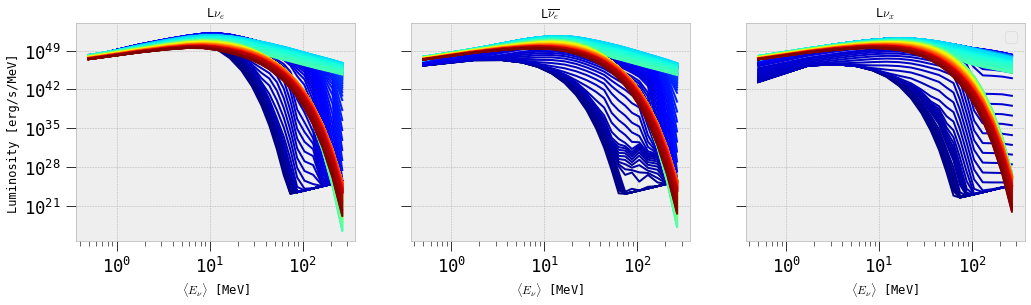

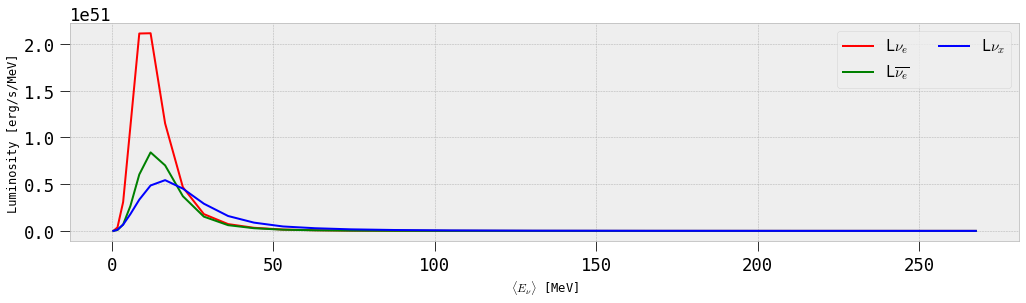

In [8]:
plotter.plot_data(x='energy');
plotter.plot_data(x='energy', ftype='single', xscale='linear', yscale='linear');

#### Number Flux Plots<a class="anchor" id="num-plots"></a>

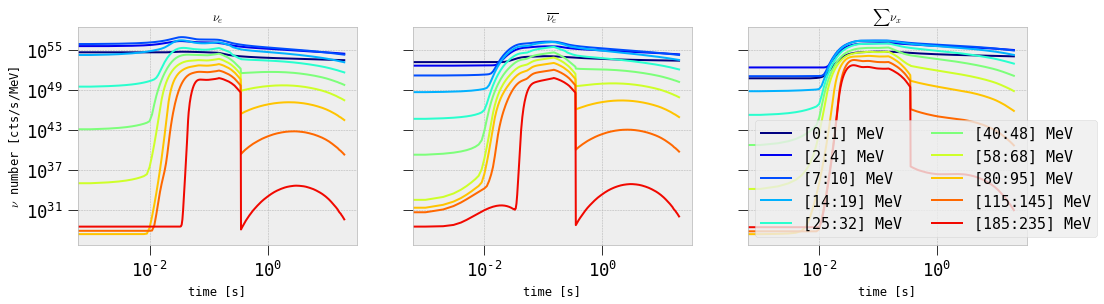

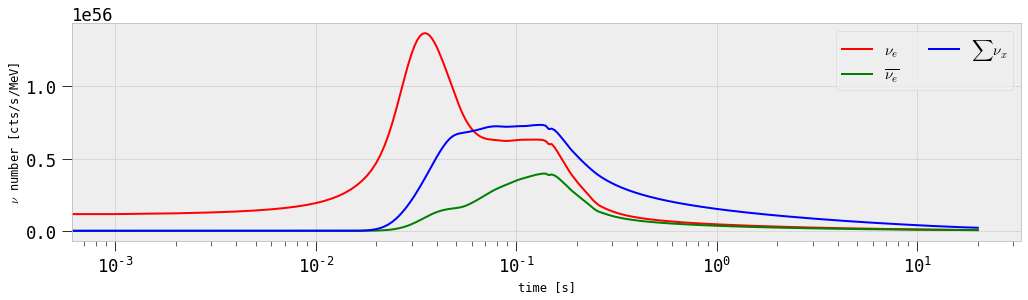

In [9]:
plotter.plot_data(y='Number');
plotter.plot_data(y='Number', ftype='single', yscale='linear');

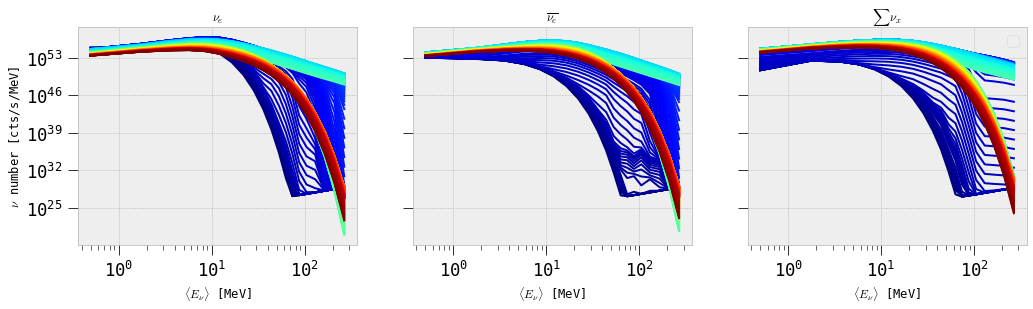

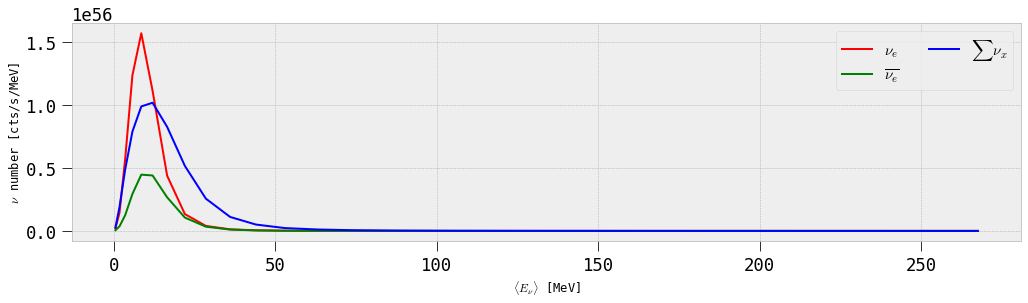

In [10]:
plotter.plot_data(x='energy', y='Number');
plotter.plot_data(x='energy', y='Number', ftype='single', xscale='linear', yscale='linear');

#### Integrated Neutrino Flux<a class="anchor" id="nu-flux"></a>

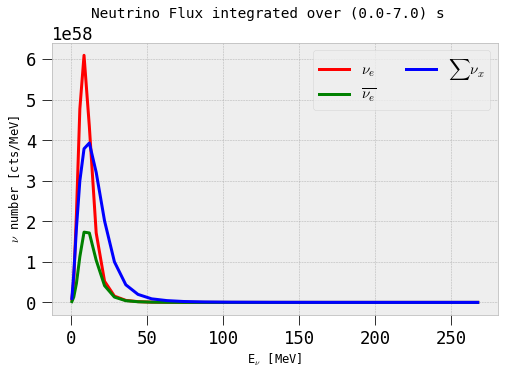

In [11]:
fig, axs = plotter.plot_data_integrated(t0=0, tf=7, ftype='single', figsize=(8,5), xscale='linear', yscale='linear')

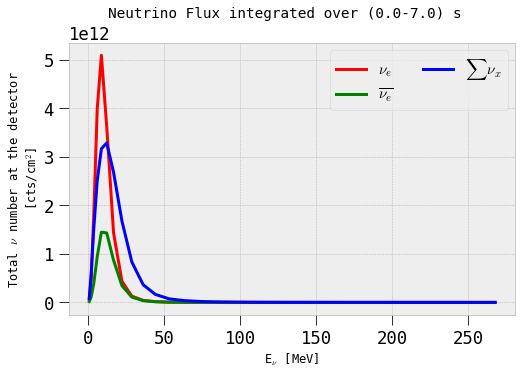

In [12]:
fig, ax = plotter.plot_data_integrated(t0=0, tf=7, ftype='single', figsize=(8,5), xscale='linear', yscale='linear',
                                        at_detector=True)

#### Recoil Energy Spectrum

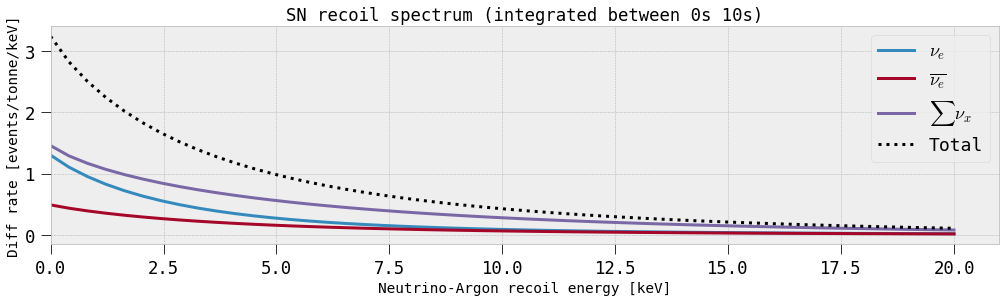

In [13]:
plotter.plot_recoil_spectra();
#plt.savefig('Argon recoil spectrum' + M30sn_model.name + '.pdf')

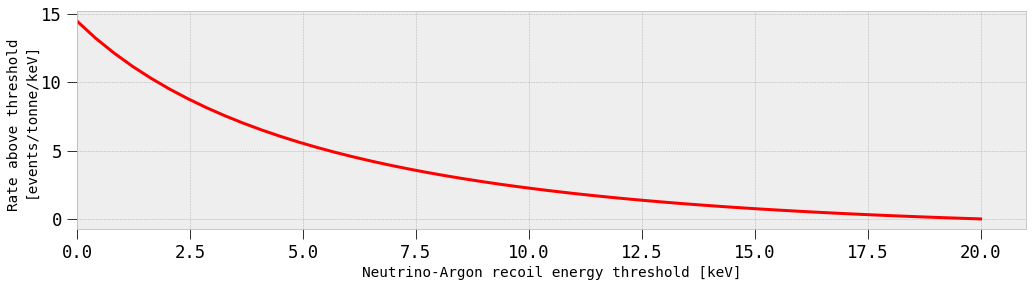

In [14]:
plotter.plot_rate_above_threshold();

2D rates do not exist!


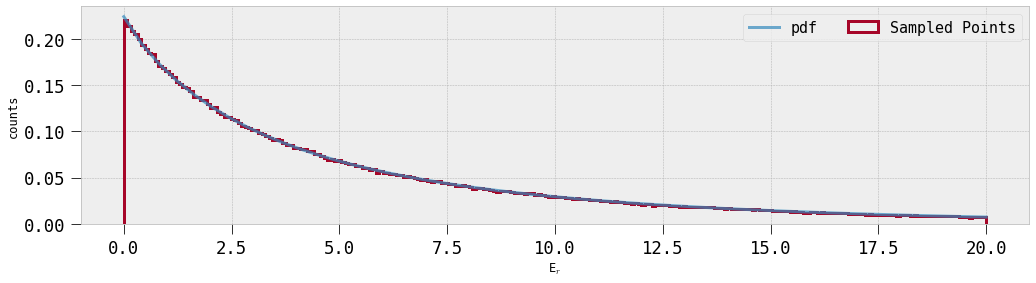

In [15]:
fig, ax, samples = plotter.plot_sampled_energies()

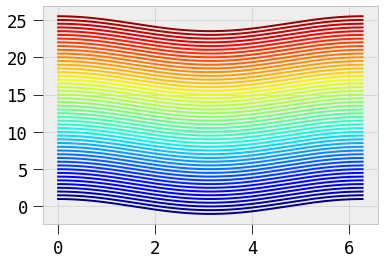

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
cmap = matplotlib.cm.get_cmap('jet')

x = np.linspace(0, 2*np.pi, 200)
y = np.cos(x)

for i in range(50):
    plt.plot(x,y+i/2, c=cmap(i/50))